# **When Should I Book Flight Tickets to Get the Best Deal?**


This project analyzes how flight prices change over time and predicts fares based on features users typically know such as the route, class, number of stops and how early they book. Using flight data, it offers tips on when to book flights to get the best deals.

**Steps:**

1. Importing all the necessary libraries  
   

2. Loading the dataset and exploring the data  


3. Exploratory Data Analysis (EDA)  
   

4. Statistical Analysis & Insights  


5. Predictive Modeling


**Step 1: Importing all the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Step 2: Loading the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving flights_new.csv to flights_new.csv


**2.1 Reading the dataset**

In [ ]:
df = pd.read_csv("flights_new.csv")
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


**2.2 Dataset Description**

In [ ]:
# Shape
print(f"\n Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

# Column names with their data types
print("\n Column names and data types:")
print(df.dtypes)


 Dataset has 300163 rows and 12 columns

 Column names and data types:
Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left           float64
price               float64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300163 entries, 0 to 300162
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300163 non-null  int64  
 1   airline           300163 non-null  object 
 2   flight            300163 non-null  object 
 3   source_city       300163 non-null  object 
 4   departure_time    300158 non-null  object 
 5   stops             300163 non-null  object 
 6   arrival_time      300163 non-null  object 
 7   destination_city  300163 non-null  object 
 8   class             300163 non-null  object 
 9   duration          300158 non-null  float64
 10  days_left         300158 non-null  float64
 11  price             300158 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 27.5+ MB


In [ ]:
# numeric columns summary
print("\n Summary statistics :")
display(df.describe())


# categorical columns summary
print("\n Unique values in each categorical column:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values → {df[col].unique()[:5]}...")


 Summary statistics :


,Unnamed: 0,duration,days_left,price
count,300163.000000,300158.000000,300158.000000,300158.000000
mean,150075.137465,12.220969,26.004841,20889.581680
std,86646.242048,7.191962,13.561023,22697.742516
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.500000,6.830000,15.000000,4783.000000
50%,150073.000000,11.250000,26.000000,7425.000000
75%,225112.500000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000



 Unique values in each categorical column:
airline: 6 unique values → ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo']...
flight: 1561 unique values → ['SG-8709' 'SG-8157' 'I5-764' 'UK-995' 'UK-963']...
source_city: 6 unique values → ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad']...
departure_time: 6 unique values → ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night']...
stops: 3 unique values → ['zero' 'one' 'two_or_more']...
arrival_time: 6 unique values → ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening']...
destination_city: 6 unique values → ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']...
class: 2 unique values → ['Economy' 'Business']...


 **2.3 Data Cleaning**

In [ ]:
# Dropping the index column
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Standardizing column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Missing values check
print(" Missing values before cleaning:")
print(df.isnull().sum())

 Missing values before cleaning:
airline             0
flight              0
source_city         0
departure_time      5
stops               0
arrival_time        0
destination_city    0
class               0
duration            5
days_left           5
price               5
dtype: int64


In [ ]:
print("Duplicates before:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Duplicates after:", df.duplicated().sum())


Duplicates before: 5
Duplicates after: 0


In [ ]:
# Handling the missing values
df = df.dropna()

print(" Missing values after cleaning:")
print(df.isnull().sum())

 Missing values after cleaning:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [ ]:
assert (df['price'] >= 0).all(), "Invalid price detected"
assert (df['duration'] > 0).all(), "Invalid duration detected"
assert (df['days_left'] >= 0).all(), "Invalid days_left detected"


In [ ]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


**Step 3: Exploratory Data Analysis (EDA)**

**3.1 Distribution of Flight Ticket Prices (histogram with a Kernel Density Estimation curve)**

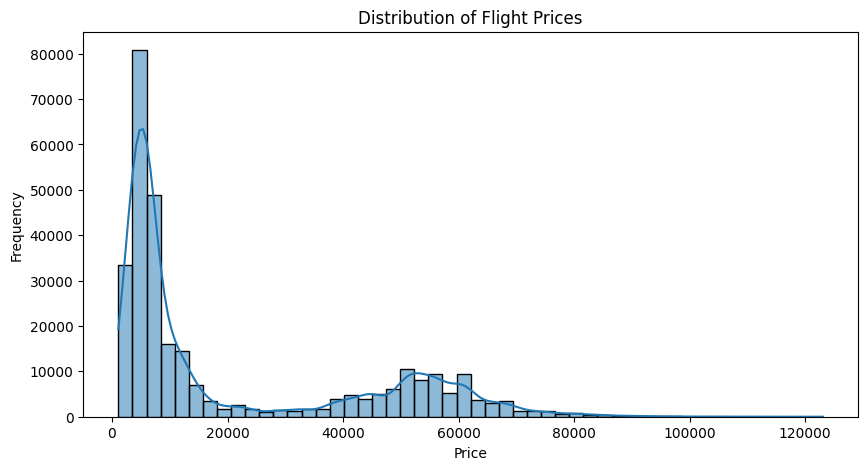

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


**3.2 Identifying the Optimal Flight Booking Window (Line Plot)**

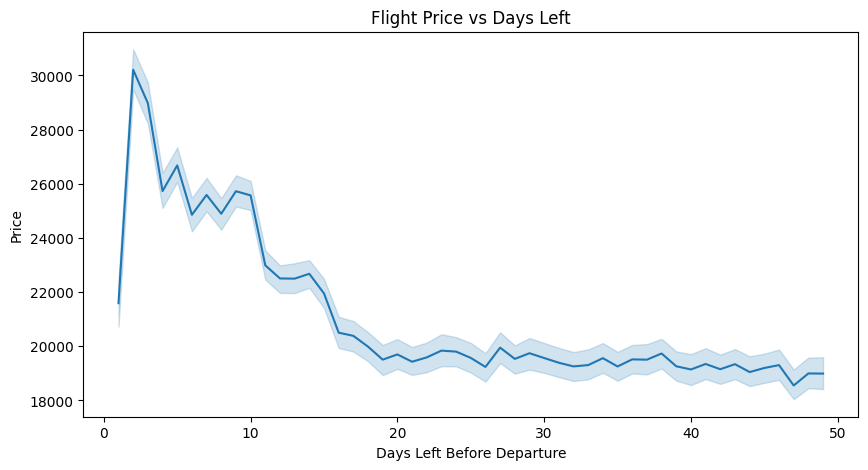

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='days_left', y='price', data=df)
plt.title('Flight Price vs Days Left')
plt.xlabel('Days Left Before Departure')
plt.ylabel('Price')
plt.show()


**3.2.1 Average Price Comparison**

In [ ]:
# Average prices
late_price = df[df['days_left'] <= 5]['price'].mean()
early_price = df[df['days_left'] > 25]['price'].mean()

# Savings
savings = late_price - early_price
savings_percent = (savings / late_price) * 100

print(f"0–5 days avg price: ₹{late_price:.0f}")
print(f"25+ days avg price: ₹{early_price:.0f}")
print(f"Savings: ₹{savings:.0f} ({savings_percent:.1f}%)")



0–5 days avg price: ₹27132
25+ days avg price: ₹19333
Savings: ₹7799 (28.7%)


,price
days_left,
1.0,21591.867151
2.0,30211.299801
3.0,28976.083569
4.0,25730.905653
5.0,26679.773368
6.0,24856.493902
7.0,25588.367351
8.0,24895.883995
9.0,25726.246072


**3.3 Identifying budget-friendly airlines or expensive ones (Boxplot)**

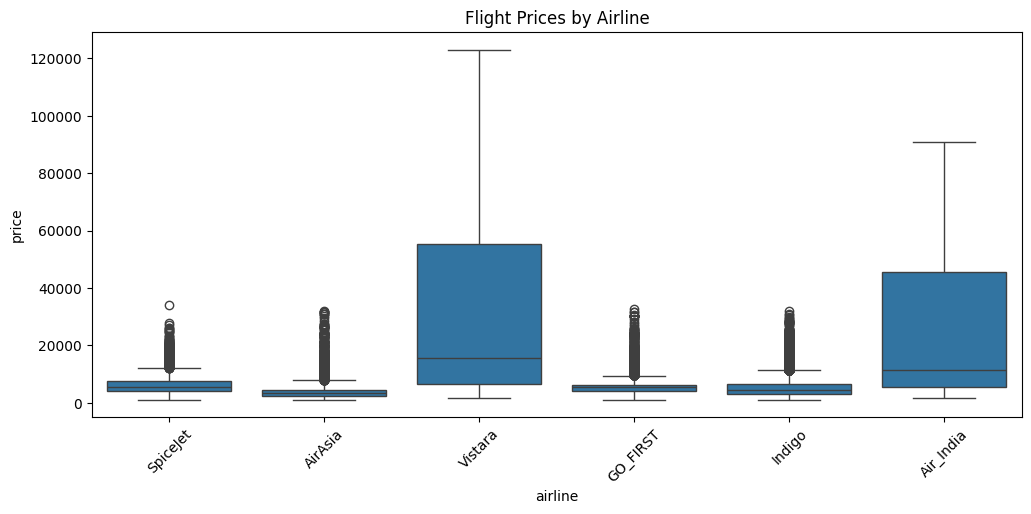

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='airline', y='price', data=df)
plt.title("Flight Prices by Airline")
plt.xticks(rotation=45)
plt.show()

**3.3.1 Flight Price Distribution by Airline (Sorted by Median)**

In [ ]:
airline_stats = (
    df.groupby('airline')['price']
      .describe()[['min', '25%', '50%', '75%', 'max']]
      .sort_values(by='50%', ascending=False)
)

print(airline_stats)


              min     25%      50%      75%       max
airline                                              
Vistara    1714.0  6412.0  15543.0  55377.0  123071.0
Air_India  1526.0  5623.0  11520.0  45693.0   90970.0
SpiceJet   1106.0  4197.0   5654.0   7412.0   34158.0
GO_FIRST   1105.0  4205.0   5336.0   6324.0   32803.0
Indigo     1105.0  3219.0   4453.0   6489.0   31952.0
AirAsia    1105.0  2361.0   3276.0   4589.0   31917.0


**3.4 By how much does Business class cost extra? (Boxplot)**

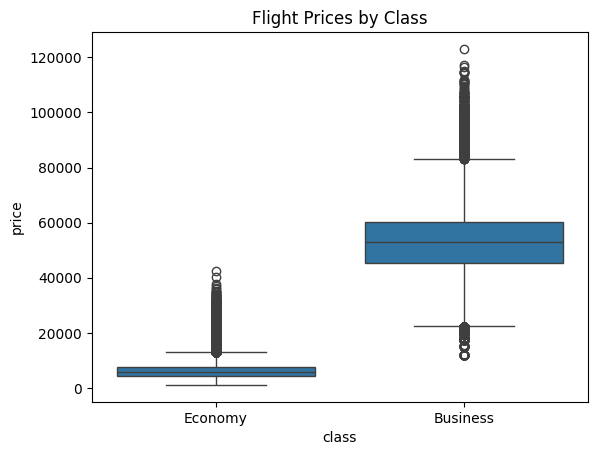

In [ ]:
sns.boxplot(x='class', y='price', data=df)
plt.title("Flight Prices by Class")
plt.show()

**3.4.1 Price Summary Statistics by Travel Class**

In [ ]:
df.groupby('class')['price'].describe()[['min', '25%', '50%', '75%', 'max']]


,min,25%,50%,75%,max
class,,,,,
Business,12000.0,45185.0,53164.0,60396.0,123071.0
Economy,1105.0,4173.0,5772.0,7746.0,42349.0


**3.5 Are non-stop flights are worth the extra money? (Boxplot)**

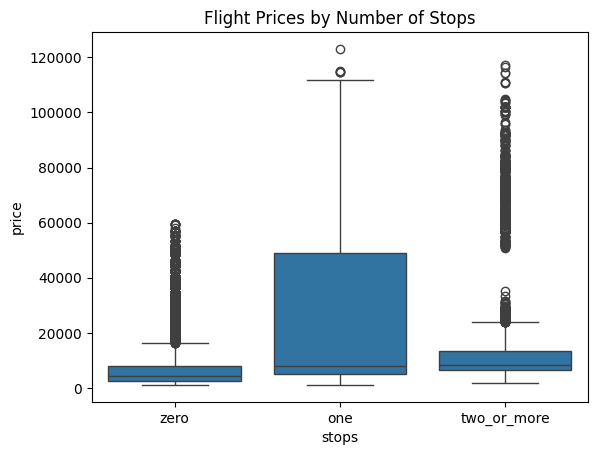

In [ ]:
sns.boxplot(x='stops', y='price', data=df)
plt.title("Flight Prices by Number of Stops")
plt.show()

**3.5.1 Price Summary Statistics by number of stops**

In [ ]:
df.groupby('stops')['price'].describe()[['min', '25%', '50%', '75%', 'max']]


,min,25%,50%,75%,max
stops,,,,,
one,1105.0,5136.0,7959.0,48851.0,123071.0
two_or_more,1966.0,6432.0,8307.0,13419.0,117307.0
zero,1105.0,2586.0,4499.0,8064.0,59573.0


**3.6 Are price and days_left strongly (negatively) correlated?**

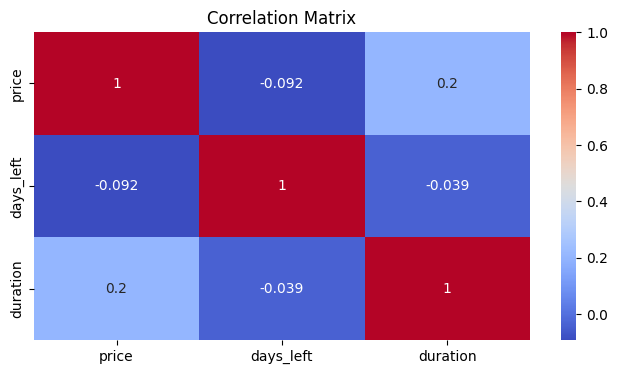

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[['price', 'days_left', 'duration']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



**3.7 Cheaper times of day to fly**

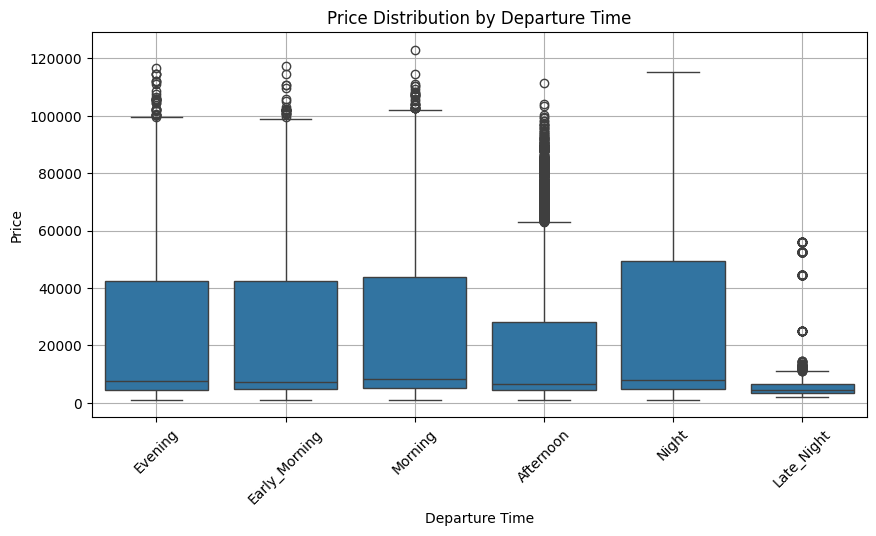

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='departure_time', y='price', data=df)
plt.title('Price Distribution by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**3.7.1 Price Distribution Based on Departure Time**

In [ ]:
df.groupby('departure_time')['price'].describe()[['min', '25%', '50%', '75%', 'max']]


,min,25%,50%,75%,max
departure_time,,,,,
Afternoon,1105.0,4593.0,6663.0,27976.0,111437.0
Early_Morning,1105.0,4757.0,7212.0,42424.0,117307.0
Evening,1105.0,4593.0,7425.0,42521.0,116562.0
Late_Night,2050.0,3393.0,4499.0,6459.5,56058.0
Morning,1105.0,5208.0,8112.0,43865.0,123071.0
Night,1105.0,4731.0,7813.0,49553.0,115211.0


**Step 4: Statistical Analysis & Insights**

**4.1 Hypothesis Test: Does flight class affect Price?**

In [ ]:
from scipy.stats import ttest_ind

# Flight class wise prices
business_prices = df[df['class'] == 'Business']['price']
economy_prices = df[df['class'] == 'Economy']['price']

# Independent T-test
t_stat, p_val = ttest_ind(business_prices, economy_prices, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.5f}")


T-statistic: 1063.84
P-value: 0.00000


There is a statistically significant difference between the prices of Business and Economy class tickets.
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that class type has a major impact on ticket price.

**4.2 Price Trends by Booking Window**

In [ ]:
# Buckets of days left
df['days_bucket'] = pd.cut(df['days_left'],
                           bins=[0, 5, 10, 20, 30, 60, 90],
                           labels=['0–5', '6–10', '11–20', '21–30', '31–60', '61–90'])

# Grouping by days bucket and finding the mean price
avg_price_by_bucket = df.groupby('days_bucket')['price'].mean().reset_index()

print(avg_price_by_bucket)



  days_bucket         price
0         0–5  27132.161103
1        6–10  25326.878559
2       11–20  21260.475515
3       21–30  19625.787849
4       31–60  19260.919021
5       61–90           NaN


/tmp/ipython-input-27-6054080.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_bucket = df.groupby('days_bucket')['price'].mean().reset_index()


**4.3 Average Price by Airline**


In [ ]:
airline_avg_price = df.groupby('airline')['price'].mean().sort_values().reset_index()
print(airline_avg_price)


     airline         price
0    AirAsia   4091.072742
1     Indigo   5324.216303
2   GO_FIRST   5652.007595
3   SpiceJet   6179.278881
4  Air_India  23507.019112
5    Vistara  30396.536302


**4.4 Duration vs Price (Correlation)**

In [ ]:
duration_corr = df['price'].corr(df['duration'])
print(f"Correlation between price and duration: {duration_corr:.2f}")


Correlation between price and duration: 0.20


No strong relationship between flight duration and price.

**4.5 Outlier Statistics**

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"Total outliers found: {len(outliers)}")


Total outliers found: 123


**Step 5: Predictive Modeling**

**5.1 Selecting user known Features for Modeling**

In [ ]:
user_cols = ['airline', 'source_city', 'destination_city', 'departure_time', 'stops', 'class', 'days_left']
X = df[user_cols]
y = df['price']

categorical_cols = ['airline', 'source_city', 'destination_city', 'departure_time', 'stops', 'class']
numerical_cols = ['days_left']


**5.2 Preprocessing setup**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    (
        'cat',
        OneHotEncoder(sparse_output=True, handle_unknown='ignore'),
        categorical_cols
    )
], remainder='passthrough')


**5.3 Train/ Test split**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**5.4 Random Forest Regressor Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=50, random_state=42))
])

rf_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['airline', 'source_city',
                                                   'destination_city',
                                                   'departure_time', 'stops',
                                                   'class'])])),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

**Deciding if a feature is useful**

In [ ]:
df['flight'].nunique()


1561

In [ ]:
df['flight'].value_counts().head(10)


,count
flight,
UK-706,3235
UK-772,2741
UK-720,2650
UK-836,2542
UK-822,2468
UK-828,2440
UK-874,2423
UK-832,2404
UK-826,2335


In [ ]:
df['flight'].value_counts().tail(10)

,count
flight,
SG-8913,1
I5-737,1
G8-705,1
SG-9923,1
SG-8480,1
6E-2914,1
G8-107,1
SG-9974,1
6E-865,1


In [ ]:
df.groupby('flight')['price'].mean().sort_values()

,price
flight,
6E-7141,1105.000000
6E-7259,1105.000000
6E-7252,1105.000000
6E-557,1105.000000
6E-987,1443.000000
...,...
UK-970,39421.341424
UK-985,39568.600798
UK-930,39953.565074


**5.5 Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred_train = rf_pipeline.predict(X_train)
y_pred_test = rf_pipeline.predict(X_test)


def evaluate_model(y_true, y_pred, label=""):
    print(f"{label} R² Score : {r2_score(y_true, y_pred):.4f}")
    print(f"{label} MAE      : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"{label} RMSE     : {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")


evaluate_model(y_train, y_pred_train, label="Train")
evaluate_model(y_test, y_pred_test, label="Test")


Train R² Score : 0.9724
Train MAE      : 1904.01
Train RMSE     : 3770.50
Test R² Score : 0.9602
Test MAE      : 2347.45
Test RMSE     : 4531.45


**5.6 Simulate User Scenario — “When Should I Book?”**

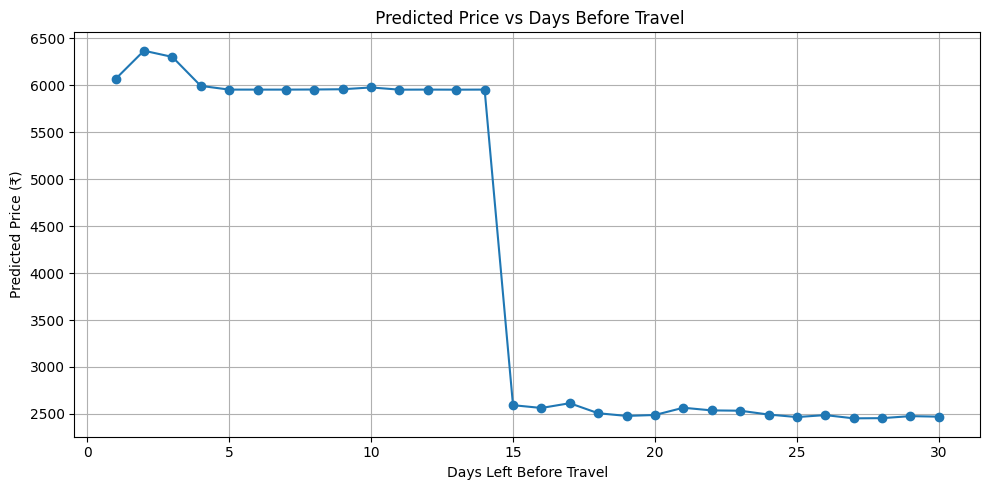

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example of a booking scenario
sample_input = {
    'airline': 'IndiGo',
    'source_city': 'Delhi',
    'destination_city': 'Mumbai',
    'departure_time': 'Morning',
    'stops': 'zero',
    'class': 'Economy'
}

# Creating inputs with varying days_left
days_range = list(range(1, 31))  # From 1 to 30 days left
inputs = pd.DataFrame([{**sample_input, 'days_left': d} for d in days_range])

# Predict prices
predicted_prices = rf_pipeline.predict(inputs)


plt.figure(figsize=(10, 5))
plt.plot(days_range, predicted_prices, marker='o')
plt.title(' Predicted Price vs Days Before Travel')
plt.xlabel('Days Left Before Travel')
plt.ylabel('Predicted Price (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


**5.7 Feature Importance**

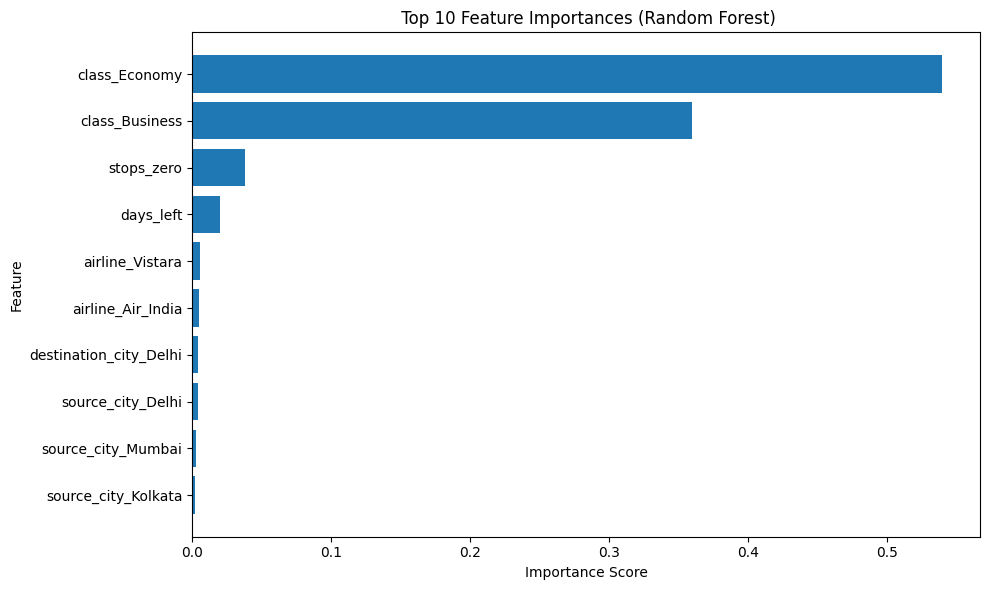

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting encoded feature names (OneHotEncoder)
encoded_cat_features = rf_pipeline.named_steps['preprocessor']\
    .transformers_[0][1]\
    .get_feature_names_out(categorical_cols)

# Combining with numerical columns
all_feature_names = np.concatenate([encoded_cat_features, numerical_cols])


importances = rf_pipeline.named_steps['model'].feature_importances_

# To display top features
feat_imp = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Top 10 Important Features
plt.figure(figsize=(10, 6))
plt.barh(feat_imp.head(10)['Feature'][::-1], feat_imp.head(10)['Importance'][::-1])
plt.title(' Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
